# 1. Data Loading and Preprocessing :
• Download the MNIST dataset and load it into your preferred development environment (e.g., Python).

• Preprocess the data by normalizing pixel values and splitting it into training and testing sets.


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense

from keras.optimizers import SGD, RMSprop, Adam, Adagrad
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.losses import binary_crossentropy
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.python.keras import regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import fetch_openml

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.datasets import mnist
# from sklearn.model_selection import train_test_split


# # Load the MNIST dataset
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# # Normalize pixel values to be between 0 and 1
# x_train = x_train / 255.0
# x_test = x_test / 255.0
# y_train = y_train.astype(int)
# # Split the data into training and testing sets
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# print("Training data shape:", x_train.shape)
# print("Validation data shape:", x_val.shape)
# print("Testing data shape:", x_test.shape)

Training data shape: (54000, 28, 28)
Validation data shape: (6000, 28, 28)
Testing data shape: (10000, 28, 28)


In [ ]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

y = y.astype(int)

x_train, x_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(




---


This code snippet loads the MNIST dataset consisting of digital images of handwritten digits along with their corresponding labels.

 It then preprocesses the data for machine learning model training.

  The data is split into training and testing sets, and the values are scaled to a specific range to ensure uniformity of scale.


---



# 2. Baseline Model with Traditional Machine Learning Algorithms :
• Implement a baseline model using traditional machine learning algorithms such as logistic regression.


• Evaluate the baseline model's performance using appropriate evaluation metrics.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Flatten the images
# x_train_flat = x_train.reshape(x_train.shape[0], -1)
# x_val_flat = x_val.reshape(x_val.shape[0], -1)
# x_test_flat = x_test.reshape(x_test.shape[0], -1)

logistic_model = LogisticRegression()

logistic_model.fit(x_train, y_train)

test_predictions = logistic_model.predict(x_test)

test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)

print("Classification Report for Test Set:")
print(classification_report(y_test, test_predictions))


Test Accuracy: 0.9211428571428572
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.91      0.89      0.90      1380
           3       0.90      0.90      0.90      1433
           4       0.92      0.93      0.92      1295
           5       0.87      0.89      0.88      1273
           6       0.95      0.96      0.95      1396
           7       0.93      0.94      0.93      1503
           8       0.90      0.87      0.89      1357
           9       0.91      0.89      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




---



This code utilizes logistic regression to classify images in the MNIST dataset.

 The model is trained on the training data and then evaluated using test accuracy and a classification report.

  The test accuracy of the model on the dataset is determined to be 92.11%.


---



# 3. Ensemble of Machine Learning Algorithms:
• Create an ensemble of three different machine learning algorithms (e.g., Decision Trees, Random Forest, Support Vector Machines) and train them on the
MNIST dataset.

• Combine the predictions of individual models using techniques such as averaging or voting.

• Evaluate the ensemble model's performance and compare it with the baseline model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Initialize individual classifiers
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC(probability=True)  # Set probability=True for SVC to enable probability estimates for voting

# Create the ensemble classifier using voting
ensemble_clf = VotingClassifier(estimators=[('dt', decision_tree), ('rf', random_forest), ('svm', svm)], voting='soft')

# Train the ensemble model
# ensemble_clf.fit(x_train_flat, y_train)

# # Evaluate the ensemble model on validation set
# val_ensemble_predictions = ensemble_clf.predict(x_val_flat)
# val_ensemble_accuracy = accuracy_score(y_val, val_ensemble_predictions)
# print("Validation Accuracy of Ensemble Model:", val_ensemble_accuracy)

# # Evaluate the ensemble model on test set
# test_ensemble_predictions = ensemble_clf.predict(x_test_flat)
# test_ensemble_accuracy = accuracy_score(y_test, test_ensemble_predictions)
# print("Test Accuracy of Ensemble Model:", test_ensemble_accuracy)


 ensemble classifier using soft voting, where predictions from individual classifiers are combined.

In [ ]:
for clf in (logistic_model, ensemble_clf):
  clf.fit(x_train, y_train)
  y_pred=clf.predict(x_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression 0.9211428571428572
VotingClassifier 0.9633571428571429




---


In this code, we trained both the individual model **(Logistic Regression)** and the ensemble classifier **(Voting Classifier)** using
the training data.



Then, we used each model to predict classifications on the test data. Finally, we printed the accuracy rate for each model to evaluate their performance on the test data.


---



# 4. Neural Network Model Design :
• Design and implement multiple neural network architectures for handwritten digit recognition.

• Experiment with different network architectures, including variations in the number of layers, neurons per layer, activation functions, and regularization techniques.

• Train each neural network model on the MNIST dataset and evaluate its performance and report overfitting

In [ ]:
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

**Simple Feedforward Neural Network:**


In [ ]:
# Build the model
model = models.Sequential([
    layers.Flatten(input_shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
# Define and apply Early Stopping strategy
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with Early Stopping strategy
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stopping])


# Evaluating models
print("Model 1 Evaluation")
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy for Model 1: {test_accuracy}")



Epoch 1/10
1750/1750 [==============================] - 13s 7ms/step - loss: 0.2657 - accuracy: 0.9233 - val_loss: 0.1585 - val_accuracy: 0.9553
Epoch 2/10
1750/1750 [==============================] - 11s 6ms/step - loss: 0.1138 - accuracy: 0.9660 - val_loss: 0.1131 - val_accuracy: 0.9668
Epoch 3/10
1750/1750 [==============================] - 11s 6ms/step - loss: 0.0791 - accuracy: 0.9760 - val_loss: 0.0927 - val_accuracy: 0.9721
Epoch 4/10
1750/1750 [==============================] - 11s 6ms/step - loss: 0.0580 - accuracy: 0.9827 - val_loss: 0.1001 - val_accuracy: 0.9690
Epoch 5/10
1750/1750 [==============================] - 10s 6ms/step - loss: 0.0434 - accuracy: 0.9865 - val_loss: 0.0970 - val_accuracy: 0.9712
Epoch 6/10
1750/1750 [==============================] - 11s 6ms/step - loss: 0.0355 - accuracy: 0.9890 - val_loss: 0.0822 - val_accuracy: 0.9762
Epoch 7/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.0272 - accuracy: 0.9919 - val_loss: 0.0804 - val_acc



---


In this code, we built a neural network model using Keras and applied the Early Stopping strategy to prevent overfitting.

 Then, we trained and evaluated the model using test data, and printed the accuracy rate.


---



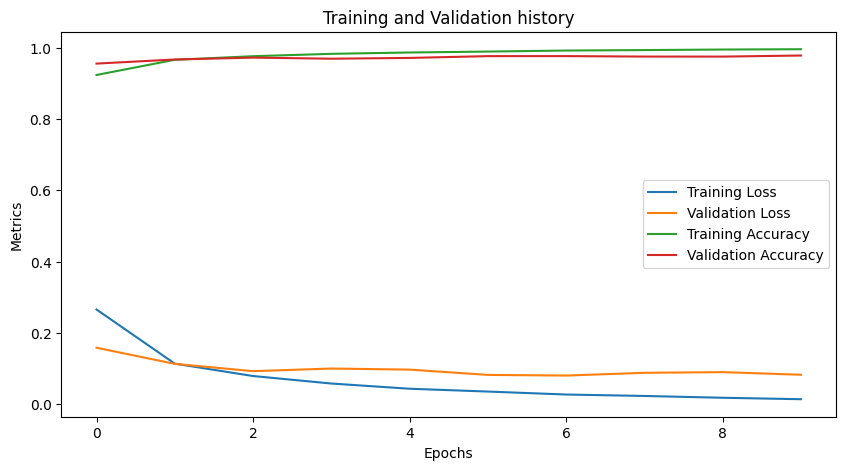

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Training and Validation history')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()

**Deep Feedforward Neural Network:**


In [ ]:
# Build the model
model2 = models.Sequential([
    layers.Flatten(input_shape=(784,)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Define and apply Early Stopping strategy
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Compile the model
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with Early Stopping strategy
history2 = model2.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stopping])

# Evaluating models
print("Model 2 Evaluation")
test_loss, test_accuracy = model2.evaluate(x_test, y_test)
print(f"Test Accuracy for Model 2: {test_accuracy}")


Epoch 1/10
1750/1750 [==============================] - 29s 15ms/step - loss: 0.1955 - accuracy: 0.9402 - val_loss: 0.1214 - val_accuracy: 0.9621
Epoch 2/10
1750/1750 [==============================] - 24s 14ms/step - loss: 0.0871 - accuracy: 0.9725 - val_loss: 0.1185 - val_accuracy: 0.9653
Epoch 3/10
1750/1750 [==============================] - 24s 14ms/step - loss: 0.0607 - accuracy: 0.9811 - val_loss: 0.1015 - val_accuracy: 0.9708
Epoch 4/10
1750/1750 [==============================] - 26s 15ms/step - loss: 0.0471 - accuracy: 0.9850 - val_loss: 0.1066 - val_accuracy: 0.9727
Epoch 5/10
1750/1750 [==============================] - 26s 15ms/step - loss: 0.0387 - accuracy: 0.9883 - val_loss: 0.0874 - val_accuracy: 0.9760
Epoch 6/10
1750/1750 [==============================] - 24s 14ms/step - loss: 0.0316 - accuracy: 0.9898 - val_loss: 0.0833 - val_accuracy: 0.9784
Epoch 7/10
1750/1750 [==============================] - 24s 14ms/step - loss: 0.0271 - accuracy: 0.9918 - val_loss: 0.1006 -

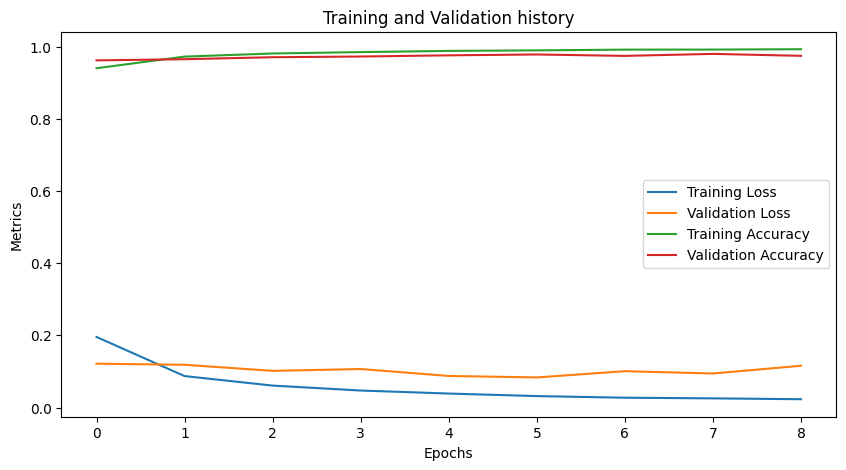

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')

plt.title('Training and Validation history')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()


Convolutional Neural Network (CNN):


In [ ]:

# model3 = models.Sequential([
#     layers.Conv2D(32, (3, 3),
#     padding= "same", activation='relu', input_shape=(28, 28, 1)),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(10, activation='softmax')
# ])


# model3.compile(optimizer='adam',
#                  loss='sparse_categorical_crossentropy',
#                  metrics=['accuracy'])

# early_stopping = EarlyStopping(monitor='val_loss', patience=3)


# history3 = model3.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stopping])


# print("Model 3 Evaluation")
# test_loss, test_accuracy = model3.evaluate(x_test, y_test)
# print(f"Test Accuracy for Model 3: {test_accuracy}")

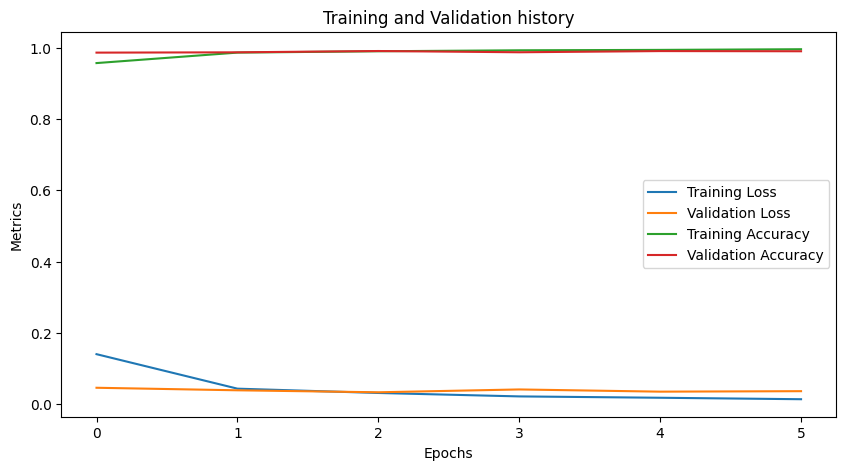

In [ ]:
# # Plotting training and validation loss
# plt.figure(figsize=(10, 5))
# plt.plot(history3.history['loss'], label='Training Loss')
# plt.plot(history3.history['val_loss'], label='Validation Loss')
# plt.plot(history3.history['accuracy'], label='Training Accuracy')
# plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')

# plt.title('Training and Validation history')
# plt.xlabel('Epochs')
# plt.ylabel('Metrics')
# plt.legend()
# plt.show()


# 5. Hyperparameter Tuning and Overfitting Mitigation :
• Perform hyperparameter tuning for the best-performing neural network architecture using techniques like Grid Search or Random Search.

• Implement strategies to mitigate overfitting in neural networks, such as dropout regularization or early stopping.

• Evaluate the tuned model's performance and compare it with the baseline and ensemble models


In [ ]:
import sys
if "google.colab" in sys.modules:
    %pip install -q -U keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.6 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

def build_model(hp):
  n_hidden = hp.Int("n_hidden", min_value=0, max_value=5)
  n_neurons = hp.Int("n_neurons", min_value=16, max_value=128)
  learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
  optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
  if optimizer == "sgd":
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
  else:
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten())
  for _ in range(n_hidden):
      model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
  model.add(tf.keras.layers.Dense(10, activation="softmax"))

  model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
  return model

In [ ]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True, seed=42)
random_search_tuner.search(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Trial 5 Complete [00h 01m 06s]
val_accuracy: 0.8391428589820862

Best val_accuracy So Far: 0.9613571166992188
Total elapsed time: 00h 06m 13s


In [ ]:
top_model = random_search_tuner.get_best_models()
best_model = top_model[0]

In [ ]:
top_params = random_search_tuner.get_best_hyperparameters()
top_params[0].values

{'n_hidden': 2,
 'n_neurons': 43,
 'learning_rate': 0.00905127409782462,
 'optimizer': 'adam'}

In [ ]:
best_model.fit(x_train, y_train, epochs=10)
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)

Epoch 1/10
1750/1750 [==============================] - 7s 3ms/step - loss: 0.1194 - accuracy: 0.9675
Epoch 2/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.1137 - accuracy: 0.9695
Epoch 3/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.1140 - accuracy: 0.9702
Epoch 4/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.1084 - accuracy: 0.9711
Epoch 5/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.1044 - accuracy: 0.9729
Epoch 6/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.1051 - accuracy: 0.9732
Epoch 7/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.1041 - accuracy: 0.9741
Epoch 8/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.0954 - accuracy: 0.9757
Epoch 9/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0959 - accuracy: 0.9754
Epoch 10/10
438/438 [==============================] - 2s 5ms/step - loss: 0.2424 

In [ ]:
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1, l2
tf.random.set_seed(42)

# Build the model
model4 = models.Sequential([
    layers.Flatten(input_shape=(784,)),
    layers.Dense(512, activation='relu'),
    BatchNormalization(),
    layers.Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    layers.Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Hyperparameter
# Define and apply Early Stopping strategy
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Compile the model
model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with Early Stopping strategy
history4 = model4.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stopping])

# Evaluating models
print("Model 4 Evaluation")
test_loss, test_accuracy = model4.evaluate(x_test, y_test)
print(f"Test Accuracy for Model 4: {test_accuracy}")

Epoch 1/10
1750/1750 [==============================] - 19s 6ms/step - loss: 0.2570 - accuracy: 0.9219 - val_loss: 0.1120 - val_accuracy: 0.9643
Epoch 2/10
1750/1750 [==============================] - 10s 6ms/step - loss: 0.1418 - accuracy: 0.9575 - val_loss: 0.1001 - val_accuracy: 0.9707
Epoch 3/10
1750/1750 [==============================] - 8s 5ms/step - loss: 0.1121 - accuracy: 0.9647 - val_loss: 0.0940 - val_accuracy: 0.9708
Epoch 4/10
1750/1750 [==============================] - 10s 5ms/step - loss: 0.0947 - accuracy: 0.9695 - val_loss: 0.0831 - val_accuracy: 0.9754
Epoch 5/10
1750/1750 [==============================] - 10s 6ms/step - loss: 0.0783 - accuracy: 0.9754 - val_loss: 0.0777 - val_accuracy: 0.9769
Epoch 6/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.0660 - accuracy: 0.9781 - val_loss: 0.0789 - val_accuracy: 0.9770
Epoch 7/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.0618 - accuracy: 0.9805 - val_loss: 0.0848 - val_accur



---


Utilized Keras Tuner library for random search to select optimal
configuration for the defined model.


Specified objective, maximum trials, and data details for model training and testing.


Obtained best model and evaluated its performance.


Built another model with multiple layers including BatchNormalization and Dropout layers.


Trained and evaluated the performance of this model as well.

---



# 6. Feature Transformation and Visualization :

• Apply Principal Component Analysis (PCA) to transform the original data into a lower-dimensional space.

• Train a neural network model on the PCA-transformed data and compare its performance with the model trained on the original data.

• Visualize the high-dimensional MNIST data in a 2D space using t-Distributed Stochastic Neighbor Embedding (t-SNE) and interpret the results

In [ ]:
from sklearn.decomposition import PCA
n_components = 70
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)

In [ ]:
# Train a neural network model on the PCA-transformed data and compare its performance with the model trained on the original data.
model_pca = Sequential()
model_pca.add(Dense(16, activation='relu', input_shape=(n_components,)))
model_pca.add(Dense(8, activation='relu'))
model_pca.add(Dense(10, activation='softmax'))

model_pca.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_pca.fit(X_train_pca, y_train, epochs=10, validation_data=(X_test_pca, y_test))

Epoch 1/10
1750/1750 [==============================] - 9s 3ms/step - loss: 0.8053 - accuracy: 0.7408 - val_loss: 0.3375 - val_accuracy: 0.9026
Epoch 2/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.2907 - accuracy: 0.9153 - val_loss: 0.2677 - val_accuracy: 0.9211
Epoch 3/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.2452 - accuracy: 0.9287 - val_loss: 0.2431 - val_accuracy: 0.9278
Epoch 4/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.2226 - accuracy: 0.9343 - val_loss: 0.2299 - val_accuracy: 0.9326
Epoch 5/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.2093 - accuracy: 0.9380 - val_loss: 0.2180 - val_accuracy: 0.9366
Epoch 6/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.1994 - accuracy: 0.9409 - val_loss: 0.2123 - val_accuracy: 0.9381
Epoch 7/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.1926 - accuracy: 0.9434 - val_loss: 0.2061 - val_accuracy:

In [ ]:
from sklearn.manifold import TSNE
# t-SNE visualization (original data)
tsne = TSNE(n_components=2, perplexity=30)
X_embedded = tsne.fit_transform(x_train)

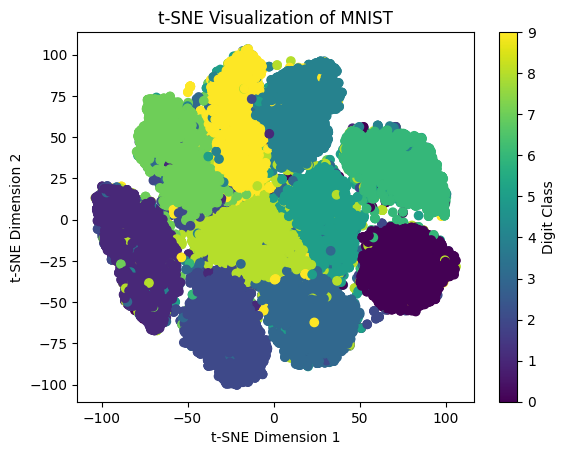

In [ ]:
# Plot t-SNE results with coloring by digit class
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_train)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE Visualization of MNIST")
plt.colorbar(label="Digit Class")
plt.show()



---


This code performs Principal Component Analysis (PCA) on the training and test data to reduce the dimensionality of the dataset.

 Then, it trains a neural network model on the PCA-transformed data and evaluates its performance.

  Additionally, it imports the t-SNE algorithm from scikit-learn to visualize the original data.


---

